In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
efs_table = "../data/effect_sizes/all.csv"
efs_df = pd.read_csv(efs_table)

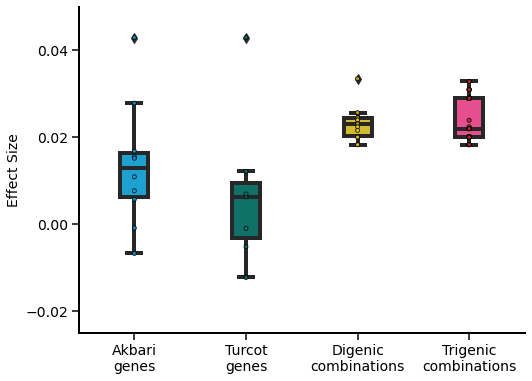

In [3]:
boxdf = efs_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(8, 6))

# Box Plot
sns_strip = sns.stripplot(
    data=boxdf,
    palette=["#00ADEE", "#008176", "#eecc16", "#c1272d", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="Description",
    y="Effect Size",
    order=["Akbari et. al.", "Turcot et. al.", "Digenic combinations", "Trigenic combinations"],
    orient="v",
    s=4,
    alpha=0.75, ec='black', linewidth=1, jitter=False, facecolors="none", dodge=False, ax=ax 
    )

sns_box = sns.boxplot(
    data=boxdf,
    palette=["#00ADEE", "#008176", "#eecc16", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    x="Description",
    y="Effect Size",
    order=["Akbari et. al.", "Turcot et. al.", "Digenic combinations", "Trigenic combinations"],
    hue_order=["Akbari et. al.", "Turcot et. al.", "Digenic combinations", "Trigenic combinations"],
    dodge=False, width=0.25, linewidth=4, fliersize=7)


# Adjust Axis
ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((-0.025, 0.05))
# ax.set_ylabel('Percentage')
ax.set_xticklabels(["Akbari\ngenes", "Turcot\ngenes", "Digenic\ncombinations", "Trigenic\ncombinations", ], rotation=0)
ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

In [4]:
digenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Digenic combinations", "Effect Size"]
trigenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Trigenic combinations", "Effect Size"]
akbari_effect_sizes = boxdf.loc[boxdf["Description"]=="Akbari et. al.", "Effect Size"]
turcot_effect_sizes = boxdf.loc[boxdf["Description"]=="Turcot et. al.", "Effect Size"]

In [5]:
ttest_ind(digenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, akbari_effect_sizes)

(Ttest_indResult(statistic=2.3357370249654372, pvalue=0.014751183840673006),
 KstestResult(statistic=0.8, pvalue=0.0004422821760278195))

In [6]:
ttest_ind(digenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, turcot_effect_sizes)

(Ttest_indResult(statistic=3.1565435609479473, pvalue=0.002729706003066182),
 KstestResult(statistic=0.8571428571428571, pvalue=0.0005159958720331037))

In [7]:
ttest_ind(trigenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, akbari_effect_sizes)

(Ttest_indResult(statistic=4.996720653699655, pvalue=1.5412443741862547e-06),
 KstestResult(statistic=0.8, pvalue=1.989870879293143e-06))

In [8]:
ttest_ind(trigenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, turcot_effect_sizes)

(Ttest_indResult(statistic=6.57760720929622, pvalue=2.08725217482329e-09),
 KstestResult(statistic=0.8571428571428571, pvalue=1.4081441675140027e-05))

In [9]:
all_combo_effect_sizes = pd.concat((digenic_effect_sizes, trigenic_effect_sizes))
published_studies_effect_sizes = pd.concat((akbari_effect_sizes, turcot_effect_sizes))

In [10]:
ttest_ind(all_combo_effect_sizes, published_studies_effect_sizes, alternative="greater"), kstest(all_combo_effect_sizes, published_studies_effect_sizes)

(Ttest_indResult(statistic=6.741614682620024, pvalue=4.36244682736719e-10),
 KstestResult(statistic=0.8235294117647058, pvalue=8.739453605244307e-11))